# TASK 4: SALES PREDICTION USING PYTHON

### Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [44]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Loading the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [45]:
advert = pd.read_csv('advertising.csv')
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [46]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Relationship between Features and Response

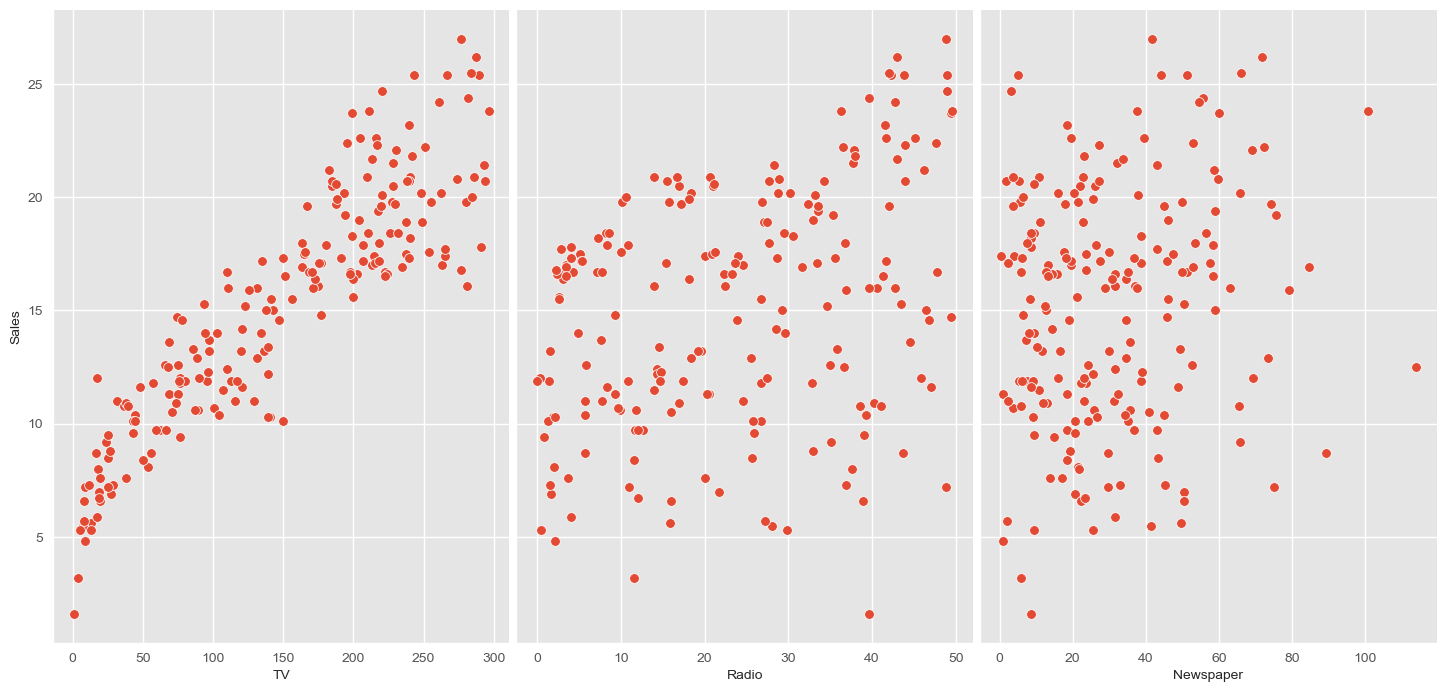

In [47]:
sns.pairplot(advert, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7);

### Multiple Linear Regression - Estimating Coefficients

In [48]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = advert[feature_cols]
y = advert.Sales

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

4.625124078808652
[0.05444578 0.10700123 0.00033566]


### Pairing the feature names with the coefficients

In [49]:
list(zip(feature_cols, lm1.coef_))

[('TV', 0.054445780337570936),
 ('Radio', 0.10700122823870299),
 ('Newspaper', 0.0003356579223305978)]

<Axes: >

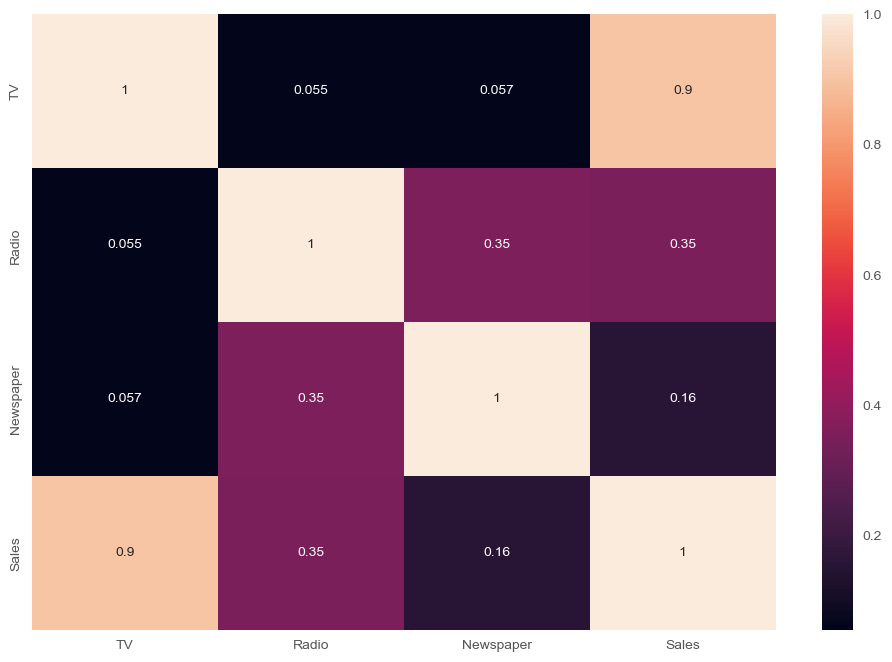

In [50]:
sns.heatmap(advert.corr(), annot=True)

### Feature Selection

In [51]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'Radio']], y)
lm2_preds = lm2.predict(X[['TV', 'Radio']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.9025896186081139


In [52]:
lm3 = LinearRegression().fit(X[['TV', 'Radio', 'Newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'Radio', 'Newspaper']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.9025912899684558


### Model Evaluation Using Train/Test Split and Metrics

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = advert[['TV', 'Radio', 'Newspaper']]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 1.509610929572584
R^2:  0.9048917241361681


In [54]:
X = advert[['TV', 'Radio']]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE : 1.5092481618667393
R^2:  0.9049374287145224


C:\Users\ashu9\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


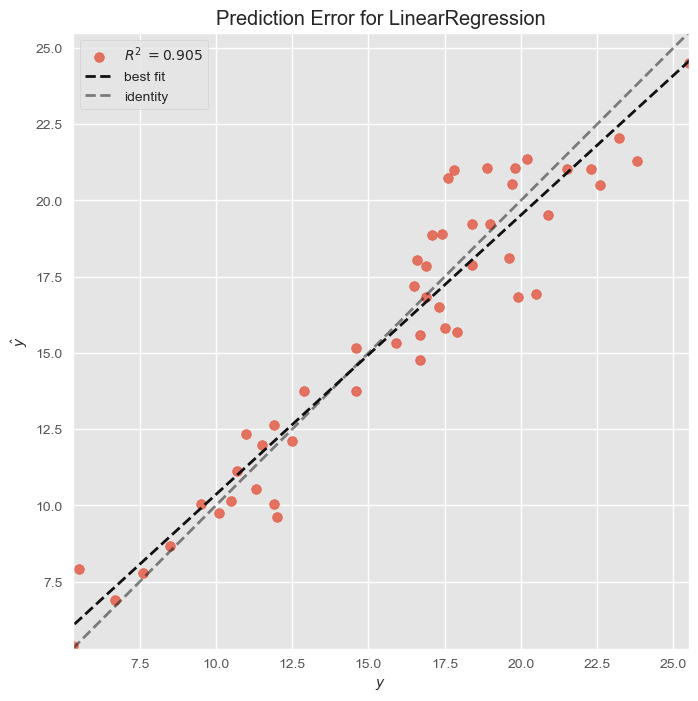

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [55]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

C:\Users\ashu9\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


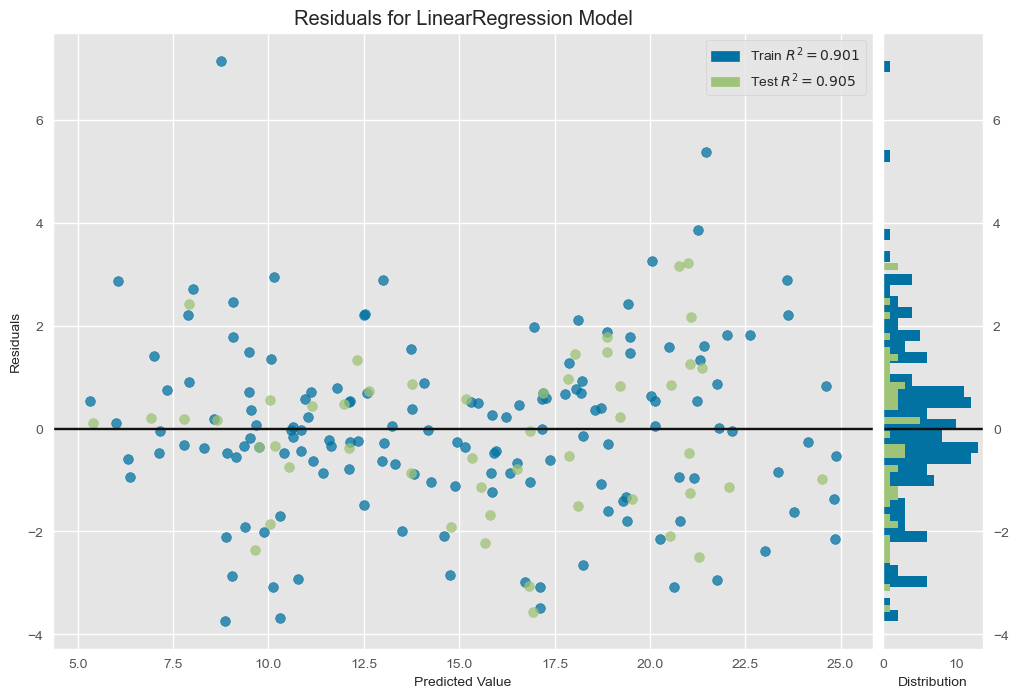

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [56]:
visualizer = ResidualsPlot(lm5)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

### Interaction Effect (Synergy)

In [57]:
advert['interaction'] = advert['TV'] * advert['Radio']

In [58]:
X = advert[['TV', 'Radio', 'interaction']]
y = advert.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression()
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

RMSE : 1.4364900270985013
R^2:  0.9138820909970508


C:\Users\ashu9\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


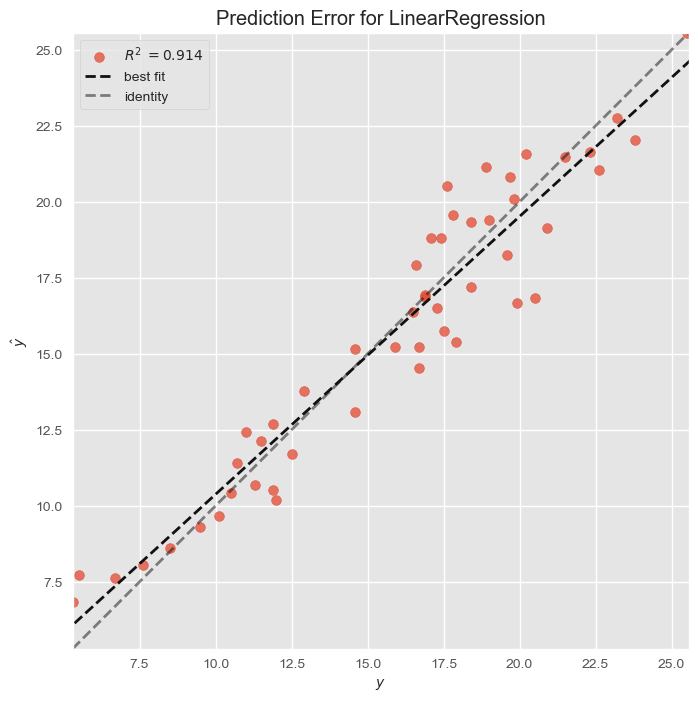

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [59]:
visualizer = PredictionError(lm6)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof() 

# ASHUTOSH KALYANKAR 